# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

This project aims to analyze a set of given job descriptions and predict the salaries of new job postings.  

In [256]:
# Data analysis libraries
import pandas as pd
import sklearn as sk
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries (Scikit learn)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



__author__ = "Fanta Coulibaly"
__email__ = "facoulib@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [163]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')
train_salaries = pd.read_csv('train_salaries.csv')

#### Examine the dataframes

In [164]:
train_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [165]:
test_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [166]:
train_salaries.head(20)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [169]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [170]:
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [171]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


#### Combine the training features and salaries into one comprehensive training dataset

In [173]:
train_data = pd.merge(train_features, train_salaries, on= 'jobId')
#train_df.head(20)
train_data.info()
#train_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [9]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [174]:
test_features.duplicated().sum()

0

In [175]:
test_features.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [176]:
train_data.duplicated().sum()

0

In [177]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [179]:
train_data[train_data['salary']<=0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Some observations have a salary value of zero. Since "salary" is the target variable, having salary value of zero will not be useful for the prediction. So, those observations will be drop.
Also, there is no missing value in the training dataframe and the test feature dataframe. 

In [180]:
train_data = train_data[train_data['salary'] >0]
train_data.shape

(999995, 9)

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

#### First, summarize the features in the test data and in the training data

In [181]:
test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [183]:
test_features.describe(include=['object'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685744109,COMP13,VICE_PRESIDENT,HIGH_SCHOOL,NONE,SERVICE
freq,1,16130,125434,238255,534068,143161


In [184]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [185]:
train_data.describe(include=['object'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684813799,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


#### Summarize the target variable "Salary"

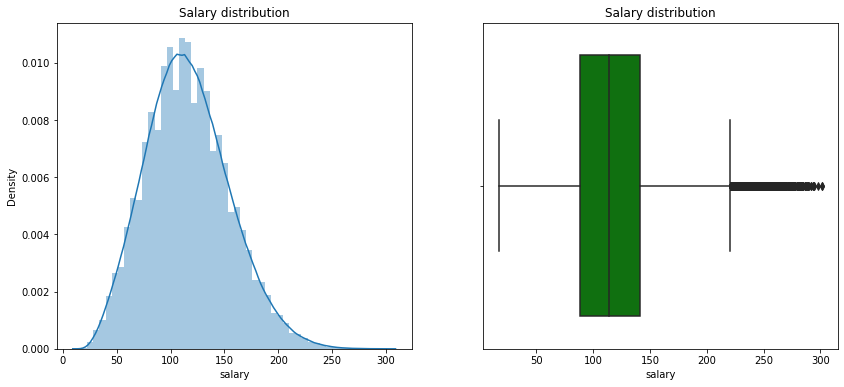

In [189]:
# Summarize the target variable "salary"
plt.figure (figsize = (14,6))
plt.subplot(1,2,1)
sns.distplot(train_data.salary)
plt.title('Salary distribution')
plt.ylabel('Density')
plt.subplot(1,2,2)
sns.boxplot(x='salary', data=train_data, color='green')
plt.title('Salary distribution')
plt.show()

The "salary" variable is normally distributed with only a few observations with more than $200,000 salary. There is no abnormal outliers from the boxplot; those have been removed previously. 

#### Find the correlation between each feature and the target variable

In [12]:

# create a function to plot each feature with the target variable
def plot_feature(df, col):
    
    plt.figure (figsize = (14,6))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64' or col =='companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values, \
                        alpha =0.1)
        plt.ylabel('Salaries')
        
    else :
        col_mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = col_mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        col_mean.sort_values().plot(kind='bar')
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Averge salary by'+ ' ' + col)
    
        plt.subplot(1,2,2)
        sns.boxplot(x=col, y='salary', data=df)
        plt.xticks(rotation=45)    
        plt.ylabel('Salaries')
    plt.show()
    

The feature "JobId" is unique to each job and it would not be necessary to plot it. 

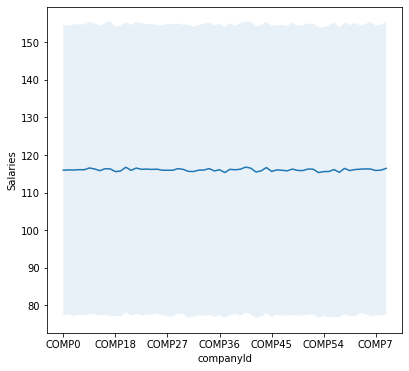

In [190]:
plot_feature(train_data, 'companyId')

There is not a correlation between the feature "companyId" and "salary". 

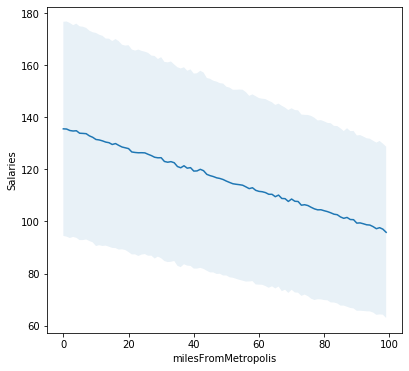

In [191]:
plot_feature(train_data, 'milesFromMetropolis')

Job positions far away from metropolis have lower salaries and job positions close to metropolis have high salaries. 

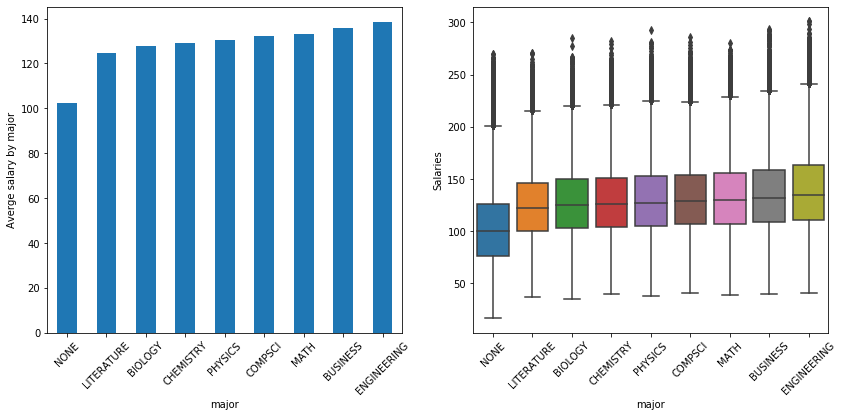

In [192]:
plot_feature(train_data, 'major')

Individuals with Engineering and business majors have the highest salaries.

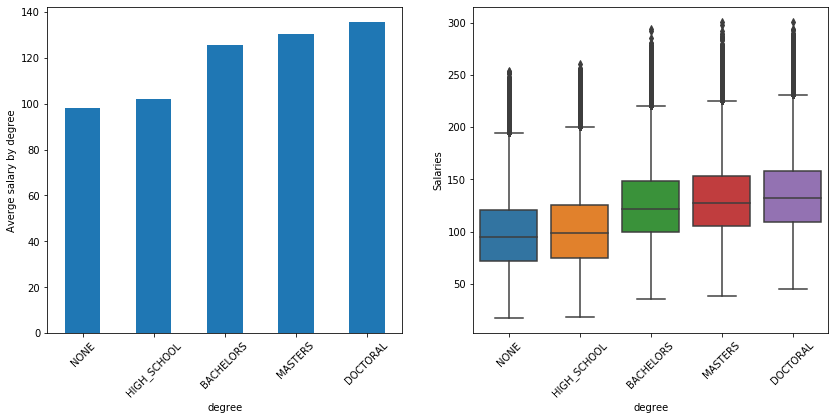

In [193]:
plot_feature(train_data, 'degree')

Individuals with doctoral and masters degrees have highest salaries and those without degrees have the lowest salaries.

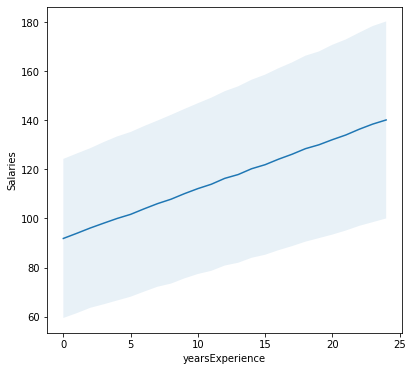

In [194]:
plot_feature(train_data, 'yearsExperience')

Job positions requiring more years of experience (more than 10 years) have the highest salaries.

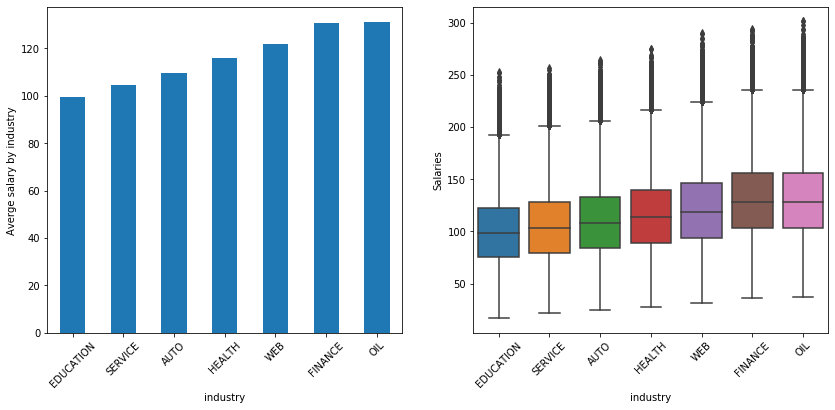

In [195]:
plot_feature(train_data,'industry')

job positions in the oil field, finance and web give the highest salaries while those in education have the lowest salaries.

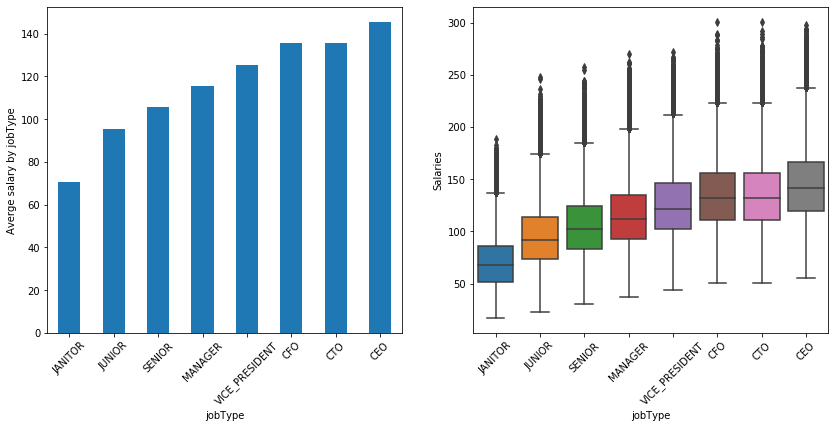

In [196]:
plot_feature(train_data,'jobType')

Upper management job positions (CEO, CTO, CFO) have the highest salaries and janitors have the lowest salaries. 

In [198]:
# Before calculating the correlation matrix, the categorical variables should be encoded using 
#the averge salary for each category to replace the labels.

def label_encode(df,col):
    # initialize categorical variables dictionatry
    category_dict ={}
    # lists of categories
    cats = df[col].cat.categories.tolist()
    # Calculate the average salary per category
    for cat in cats:
        category_dict[cat] = train_df[train_data[col] == cat]['salary'].mean()
    df[col] = df[col].map(category_dict)


In [199]:
train_data_copy= train_data.copy()
train_data_copy['companyId'] = train_data_copy['companyId'].astype('category')
for col in train_data_copy.columns:
    if train_data_copy[col].dtypes.name == 'category':
        label_encode(train_data_copy,col)
        train_data_copy[col] = train_data_copy[col].astype('float')

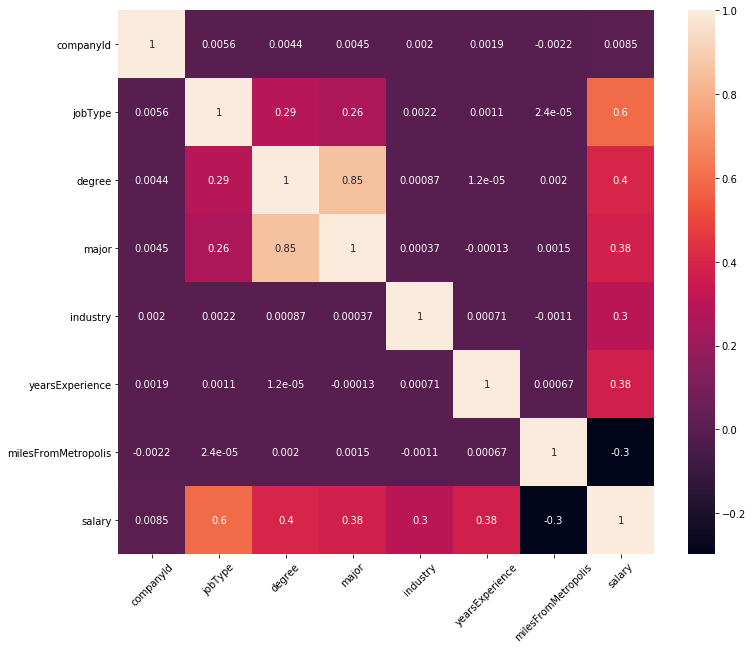

In [202]:
fig = plt.figure(figsize=(12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_data_copy[features + ['salary']].corr(),annot=True)
plt.xticks(rotation=45)
plt.show()

The correlation matrix shows that "companyId" is not correlated with "salary", "milesFromMetropolis" has a negative correlation and the all the other features have a positive correlation with the target variable "salary".

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [28]:
# The dataframe "train_data_copy" already contains the average salary per industry
MSE = mean_squared_error(train_data_copy['industry'], train_data_copy['salary'])
print('The mean squared error is',MSE)

The mean squared error is 1367.122950785255


The current mean squared error is too high, and should be reduced. 

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model

#### Lists of some regression algorithms

Linear regression model: easy to understand, works with any dataset size.

Random forest: powerful, accurate, very good performance on both linear and non-linear problems;The model is also fast to train.

Gradient boosting: has a high performance (speed and accuracy) on large and complex data.

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [229]:
features = train_data[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
predictors = pd.get_dummies(features, drop_first=True)
#print(predictors.info())
#print(predictors.shape)
print(predictors.head())

target = train_data['salary']

   yearsExperience  milesFromMetropolis  jobType_JUNIOR  jobType_SENIOR  \
0               10                   83               0               0   
1                3                   73               0               0   
2               10                   38               0               0   
3                8                   17               0               0   
4                8                   16               0               0   

   jobType_MANAGER  jobType_VICE_PRESIDENT  jobType_CFO  jobType_CTO  \
0                0                       0            1            0   
1                0                       0            0            0   
2                0                       1            0            0   
3                1                       0            0            0   
4                0                       1            0            0   

   jobType_CEO  degree_HIGH_SCHOOL  ...  major_COMPSCI  major_MATH  \
0            0                   0  ...       

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

In [224]:
# Linear regression model 
lr = LinearRegression()

In [225]:
# Random Forest model
rf= RandomForestRegressor(n_estimators=150,max_depth=25, max_features=25, random_state=0, min_samples_split=60)

In [226]:
# Gradient Boosting regressor model
gr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls', verbose=0 )

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [236]:
# Calculate the average MSE for the linear regression model
lr_score= cross_val_score(lr, predictors, target, cv=5, n_jobs=2, scoring='neg_mean_squared_error' )
mse_lr=-1*lr_score.mean()
mse_lr

384.4143373223809

In [232]:
# Calculate the average MSE for the random forest model
rf_score = cross_val_score(rf, predictors, target, cv=5, n_jobs=2, scoring='neg_mean_squared_error' )
mse_rf=-1*rf_score.mean()
mse_rf

370.5552409594093

In [234]:
# Calculate the average MSE for the gradient boosting regressor model
gr_score = cross_val_score(gr, predictors, target, cv=5, n_jobs=2, scoring='neg_mean_squared_error' )
mse_gr=-1*gr_score.mean()
mse_gr

358.5412814619749

### ---- 10 Select best model  ----

In [237]:
models_MSE =pd.DataFrame(({'Models':['Linear regression','Random Forest','Gradient Boosting Regressor'],
               'Mean Squared Error':[mse_lr,mse_rf,mse_gr]}))
models_MSE

,Models,Mean Squared Error
0,Linear regression,384.414337
1,Random Forest,370.555241
2,Gradient Boosting Regressor,358.541281


Based on the MSE values, the best model is the Gradient Boosting regressor model. 

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk, and scores the "test" dataset

#### Prepare the test data to fit in the chosen model and for prediction 

In [240]:
features_test = test_features[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
test_predictors = pd.get_dummies(features_test, drop_first=True)
#print(test_predictors.info())
#print(test_predictors.shape)
#print(test_predictors.head())

# Train the model on entire training data
gr.fit(predictors,target)

# Predict the salaries from the test data
prediction=gr.predict(test_predictors)

In [241]:
prediction_df= pd.DataFrame(prediction,columns=['Predicted Salaries'])
prediction_df.head(20)

,Predicted Salaries
0,143.293156
1,140.000311
2,136.299671
3,125.276273
4,116.435501
5,98.117043
6,147.239974
7,70.637769
8,107.326171
9,135.010645


In [260]:
predicted_data = pd.concat([test_features['jobId'], prediction_df], axis=1)
predicted_data['Predicted Salaries']=predicted_data['Predicted Salaries'].apply(np.ceil)
predicted_data.head(20)

,jobId,Predicted Salaries
0,JOB1362685407687,144.0
1,JOB1362685407688,141.0
2,JOB1362685407689,137.0
3,JOB1362685407690,126.0
4,JOB1362685407691,117.0
5,JOB1362685407692,99.0
6,JOB1362685407693,148.0
7,JOB1362685407694,71.0
8,JOB1362685407695,108.0
9,JOB1362685407696,136.0


### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [262]:
predicted_data.to_csv('Predicted_salaries.csv',index=False )

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data

In [ ]:
# Feature importances

In [244]:
feature_importances = pd.DataFrame({'Features':test_predictors.columns, 'Importance':gr.feature_importances_})

In [245]:
feature_importances.sort_values(by='Importance', ascending=False, inplace=True) # sort features by descending importance

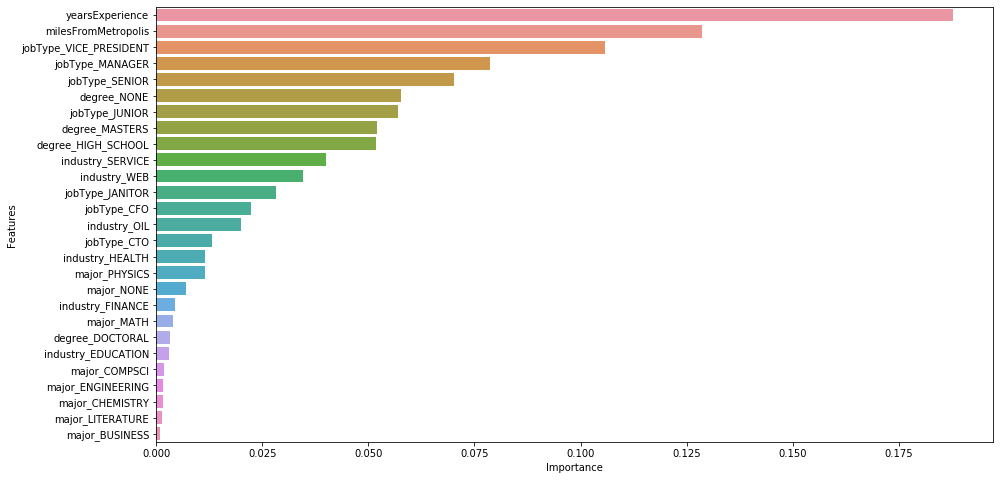

In [246]:
plt.figure(figsize=(15,8))
sns.barplot(x='Importance', y='Features', data=feature_importances)
plt.show();

## Appendix

Cross validation has also been perfomed using the train_test_split method. This method confirms that Gradient Boosting regressor is the best model to use with this dataset. 

In [129]:
#Define predictors and response variables
#X_lin_reg = train_df[['jobType','degree','major','industry','yearsExperience','milesFromMetropolis']]
#Y_lin_reg = train_df['salary']

In [203]:
#X= pd.get_dummies(X_lin_reg, drop_first=True)
#X.head()

In [247]:
#X_train, x_test, Y_train, y_test = train_test_split(X, Y_lin_reg, test_size=0.4)
#print(X_train.shape)
#print(x_test.shape)
#print(Y_train.shape)
#print(y_test.shape)

In [248]:
#lr.fit(X_train,Y_train)
#pred = lr.predict(x_test)
#pred
#lr_mse = mean_squared_error(y_test,pred)
#lr_mse

In [249]:
#rf.fit(X_train, Y_train)
#pred_rf = rf.predict(x_test)
#pred_rf
#rf_mse = mean_squared_error(y_test, pred_rf)
#rf_mse

In [250]:
#gr.fit(X_train, Y_train)
#pred_gr = gr.predict(x_test)
#pred_gr
#gr_mse = mean_squared_error(y_test, pred_gr)
#gr_mse